In [32]:
from obspy import read
from obspy.signal.trigger import ar_pick
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [33]:
st1 = read('loc_RJOB20050801145719850.e.gse2')
st2 = read('loc_RJOB20050801145719850.n.gse2')
st3 = read('loc_RJOB20050801145719850.z.gse2')

threechannels = read('loc_RJOB20050801145719850.e.gse2')
threechannels += read('loc_RJOB20050801145719850.n.gse2')
threechannels += read('loc_RJOB20050801145719850.z.gse2')

C:\Program Files\Anaconda3\lib\site-packages\obspy\io\gse2\libgse2.py:327: UserWarning: Checksum differs only in absolute value. If this file was written with ObsPy GSE2, this is due to a bug in the obspy.io.gse2.write routine (resolved with [3431]), and thus this message can be safely ignored.
  warnings.warn(msg, UserWarning)


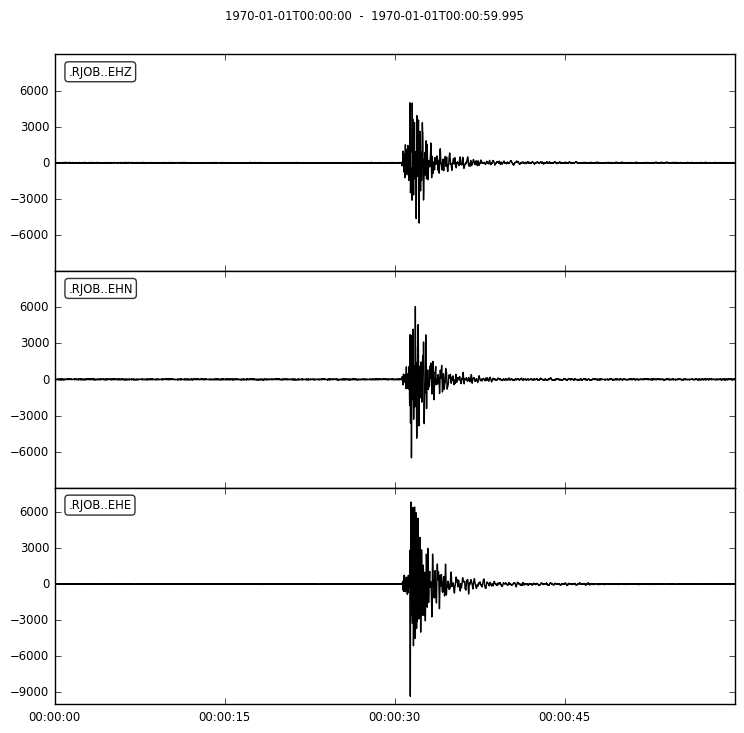

In [34]:
threechannels.plot()

In [35]:
tr1 = st1[0]
tr2 = st2[0]
tr3 = st3[0]

In [36]:
0.2/0.005

40.0

In [37]:
tr1

#1200 is number of samples
#1 / 200 is sampling rate, which is 0.005 s. In other words, they record something in the range of 0.005s

.RJOB..EHE | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:59.995000Z | 200.0 Hz, 12000 samples

In [38]:
sampling_rate=1/200
number_of_samples = 12000

In [39]:
#trx.data refers to amplitude of waveform

tr1.data
tr2.data
tr3.data

array([ 14,  11, -18, ...,  12,   2,   0])

In [40]:
#scaling numbers

#f(x)= ((b-a)*(x-min)/(max-min))+a
#b=desired value(upper bound)
#a=desired value(lower bound)
#max=known value(uppder bound)
#min=known value(lower bound)

Mt1 = np.sqrt((tr1.data)**2) 
Mt2 = np.sqrt((tr2.data)**2)
Mt3 = np.sqrt((tr3.data)**2)

#input must be 0 < input <= 1
tr1 = ((1-0.01)*(Mt1-np.min(Mt1))/(np.max(Mt1)-np.min(Mt1)))+0.01
tr2 = ((1-0.01)*(Mt2-np.min(Mt2))/(np.max(Mt2)-np.min(Mt2)))+0.01
tr3 = ((1-0.01)*(Mt3-np.min(Mt3))/(np.max(Mt3)-np.min(Mt3)))+0.01

In [41]:
tr1.shape

(12000,)

In [42]:
#create x values for the time series
#sampling rate is 200 Hz, so we obtained data for each 1/200 = 0.005 s
#start from zero, ends in 60s

t = np.arange(0,sampling_rate*number_of_samples,sampling_rate)

In [43]:
t.shape

(12000,)

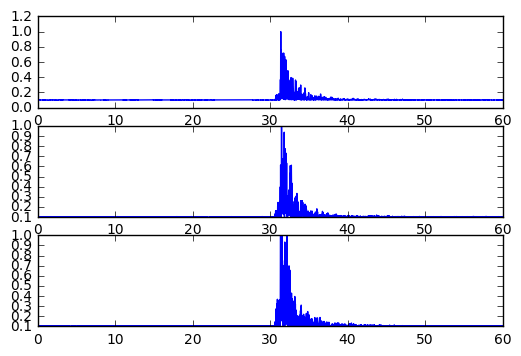

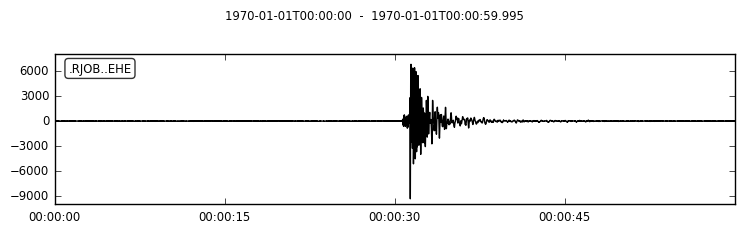

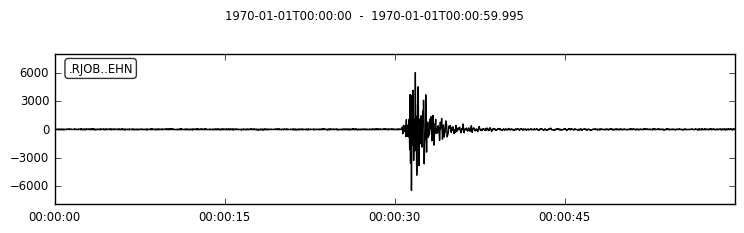

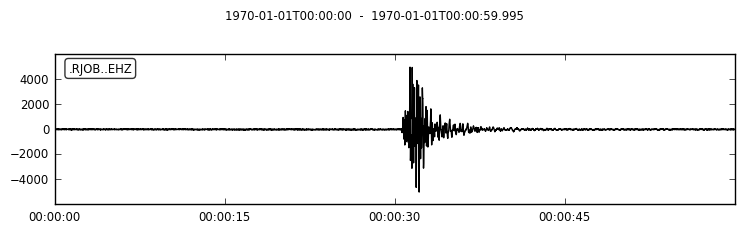

In [44]:
#plot scaled input, since input to neural network must lie between 0 and 1
#subplot is a method that plot multiple graph in one window
#33x means 3 of them are placed on the same line
#axis is a method to plot the graph with a given axis([xmin,xmax,ymin,ymax])

plt.subplot(311)
plt.plot(t,tr1)
plt.subplot(312)
plt.plot(t,tr2)
plt.subplot(313)
plt.plot(t,tr3)



st1.plot()
st2.plot()
st3.plot()

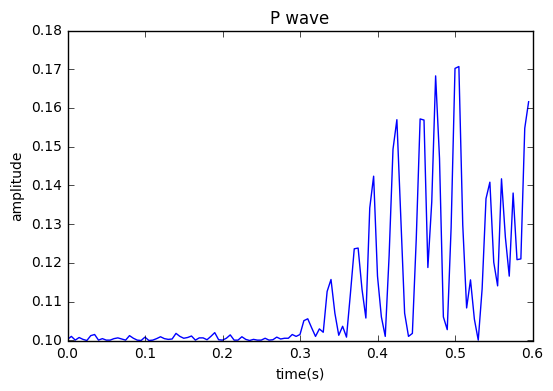

In [56]:
#P wave detected at ~30.6s
# 6106*0.05 = 30.53 + 0.1 = 30.63s

plt.title('P wave')
plt.xlabel('time(s)')
plt.ylabel('amplitude')
plt.plot(np.arange(0,sampling_rate*120,sampling_rate),tr1[6068:6188])

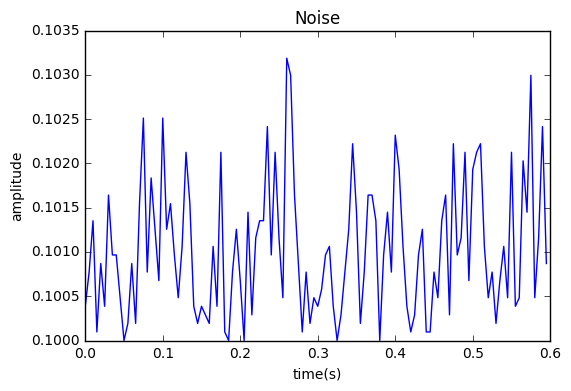

In [47]:
plt.title('Noise')
plt.xlabel('time(s)')
plt.ylabel('amplitude')
plt.plot(np.arange(0,sampling_rate*120,sampling_rate),tr1[2400:2520])

In [48]:
#S wave detected at ~30.6s

#plt.title('S wave')
#plt.xlabel('time(s)')
#plt.ylabel('amplitude')
#plt.plot(np.arange(0,0.6,0.005),tr2[6180:6300])

In [57]:
p = tr1[6068:6188]
noise = tr1[0:120]

In [63]:
p.max()-p.min()

0.070701867353509334

In [64]:
noise.max()-noise.min()

0.0028976175144880822

In [51]:
#add noise

#noise1 = []

#for i in range(0,6000,60):
    noise1.append(Mt1[i:(i+120)])
#noise1 = np.array(noise1)
#zeros1 = np.zeros((noise1.shape[0],1),dtype=int)
#noise_training = np.array(np.append(zeros1,noise1,axis=1),dtype=int)

#add p
#p = Mt1[6068:6188]
#p_wave = []

#for i in np.linspace(0.1,6,100):
    #p_wave.append(p*i)
#p_wave = np.array(p_wave)
#ones = np.ones((p_wave.shape[0],1),dtype=int)
#p_training = np.array(np.append(ones,p_wave,axis=1,),dtype=int)

In [52]:
#save the array to csv

#np.savetxt('noise_training.csv',noise_training,delimiter=',',fmt="%s")
#np.savetxt('pwave_training.csv',p_training,delimiter=',',fmt="%s")

In [53]:
p_training

array([[   1,    0,    1, ...,   21,   56,   63],
       [   1,    0,    1, ...,   34,   90,  101],
       [   1,    0,    2, ...,   47,  124,  139],
       ..., 
       [   1,   17,   64, ..., 1282, 3334, 3751],
       [   1,   17,   65, ..., 1295, 3368, 3789],
       [   1,   18,   66, ..., 1308, 3402, 3828]])

In [54]:
#Pwave1 = tr1[6067:6187]

#120 iteration

#import csv
#with open('pwave_training.csv','w',newline='') as csvfile:
    #spamwriter = csv.writer(csvfile,delimiter=',')
    #spamwriter.writerow(tr1[6068:6188])

In [55]:
#100 iteration

#import csv
#with open('noise_training_2.csv','w',newline='') as csvfile:
    #spamwriter = csv.writer(csvfile,delimiter=',')
    #for i in range(0,6000,60):
        #spamwriter.writerow(tr1[i:(i+120)])
    #for i in range(7000,12000,60):
        #spamwriter.writerow(tr1[i:(i+120)])
    